# Feature Engineering


Faeture engineering deals with preparing data for it to be processed by a ML algorithm and train a model. It is an extreme important part of the Machine learning process as it ensures our model is precise, perfectly fitted, and efficient


In [828]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import math

In [829]:
ds = pd.read_csv("Data/Housing.csv")
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [830]:
ds.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

## Imputation

Not really necessary as there are no missing values


#### a. Normal


In [831]:
threshold=0.7

In [832]:
ds = ds[ds.columns[ds.isnull().mean() < threshold]]
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [833]:
ds = ds.loc[ds.isnull().mean(axis=1) < threshold]
ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##### b. Numerical imputation


In [834]:
ds = ds.fillna(ds.mean())
ds

C:\Users\kapsu\AppData\Local\Temp/ipykernel_14940/1519456333.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  ds = ds.fillna(ds.mean())


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


##### c. Categorical Imputation


In [835]:
ds['bathrooms'].fillna(ds['bathrooms'].value_counts().idxmax(), inplace=True)
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Outlier detection


a. With standard deviation


In [836]:
factor = 2

In [837]:
parking_upper_limit= ds['parking'].mean()+factor*ds['parking'].std();
parking_lower_limit= ds['parking'].mean()-factor*ds['parking'].std();

In [838]:
print(f"upper - {parking_upper_limit}")
print(f"lower - {parking_lower_limit}")

upper - 2.416749482572466
lower - -1.0295935192697137


In [839]:
ds = ds[(ds['parking']>=parking_lower_limit) & (ds['parking'] <=parking_upper_limit)]
ds.count()

price               533
area                533
bedrooms            533
bathrooms           533
stories             533
mainroad            533
guestroom           533
basement            533
hotwaterheating     533
airconditioning     533
parking             533
prefarea            533
furnishingstatus    533
dtype: int64

b. With percentile


In [840]:
cutoff = 0.03

In [841]:
ds['bedrooms'].describe()

count    533.000000
mean       2.958724
std        0.739706
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        6.000000
Name: bedrooms, dtype: float64

In [842]:
ds['bedrooms'].value_counts()

3    293
2    135
4     91
5     10
6      2
1      2
Name: bedrooms, dtype: int64

In [843]:
upper_lim_bedrooms = ds['bedrooms'].quantile(1-cutoff)
lower_lim_bedrooms = ds['bedrooms'].quantile(cutoff)

In [844]:
temp_ds = ds[(ds['bedrooms'] < upper_lim_bedrooms) & (ds['bedrooms'] > lower_lim_bedrooms)]

In [845]:
temp_ds

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
5,10850000,7500,3,3,1,yes,no,yes,no,yes,2,yes,semi-furnished
9,9800000,5750,3,2,4,yes,yes,no,no,yes,1,yes,unfurnished
10,9800000,13200,3,1,2,yes,no,yes,no,yes,2,yes,furnished
14,9240000,7800,3,2,2,yes,no,no,no,no,0,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
533,2100000,2400,3,1,2,yes,no,no,no,no,0,no,unfurnished
537,1890000,1700,3,1,2,yes,no,no,no,no,0,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [846]:
temp_ds['bedrooms'].describe()

count    293.0
mean       3.0
std        0.0
min        3.0
25%        3.0
50%        3.0
75%        3.0
max        3.0
Name: bedrooms, dtype: float64

In [847]:
temp_ds['bedrooms'].value_counts()

3    293
Name: bedrooms, dtype: int64

In [848]:
ds.guestroom.replace(('yes','no'),(1,0),inplace=True)  # One hot encoding, more ahead

In [849]:
ds['bedrooms'] = ds['bedrooms'] + ds['guestroom']
del ds['guestroom']
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,yes,no,no,2,yes,semi-furnished
4,11410000,7420,5,1,2,yes,yes,no,yes,2,no,furnished
5,10850000,7500,3,3,1,yes,yes,no,yes,2,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,yes,2,yes,semi-furnished


## Binning


In [850]:
ds['parking'].value_counts()

0    299
1    126
2    108
Name: parking, dtype: int64

In [851]:
conditions = [ds['parking'] == 0,ds['parking'] > 0]
choices = [0,1]
ds['parking'] = np.select(conditions,choices,default=None)
ds

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,yes,1,yes,furnished
2,12250000,9960,3,2,2,yes,yes,no,no,1,yes,semi-furnished
4,11410000,7420,5,1,2,yes,yes,no,yes,1,no,furnished
5,10850000,7500,3,3,1,yes,yes,no,yes,1,yes,semi-furnished
6,10150000,8580,4,3,4,yes,no,no,yes,1,yes,semi-furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,yes,no,no,1,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,0,no,furnished


In [852]:
ds['parking'].value_counts()

0    299
1    234
Name: parking, dtype: int64

## One hot encoding


In [853]:
ds.mainroad.replace(('yes','no'),(1,0),inplace=True)


In [854]:
ds.basement.replace(('yes','no'),(1,0),inplace=True)


In [855]:
ds.hotwaterheating.replace(('yes','no'),(1,0),inplace=True)


In [856]:
ds.airconditioning.replace(('yes','no'),(1,0),inplace=True)


In [857]:
ds.prefarea.replace(('yes','no'),(1,0),inplace=True)


In [858]:
ds.furnishingstatus.replace(('furnished','semi-furnished','unfurnished'),(2,1,0),inplace=True)


In [859]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,1,1,1,2
2,12250000,9960,3,2,2,1,1,0,0,1,1,1
4,11410000,7420,5,1,2,1,1,0,1,1,0,2
5,10850000,7500,3,3,1,1,1,0,1,1,1,1
6,10150000,8580,4,3,4,1,0,0,1,1,1,1


In [860]:
ds['area'].describe()

count      533.000000
mean      5104.887430
std       2160.626731
min       1650.000000
25%       3540.000000
50%       4500.000000
75%       6325.000000
max      16200.000000
Name: area, dtype: float64

## Log transformation


In [861]:
ds['area_log'] = np.log(ds['area'])
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log
0,13300000,7420,4,2,3,1,0,0,1,1,1,2,8.911934
2,12250000,9960,3,2,2,1,1,0,0,1,1,1,9.206332
4,11410000,7420,5,1,2,1,1,0,1,1,0,2,8.911934
5,10850000,7500,3,3,1,1,1,0,1,1,1,1,8.922658
6,10150000,8580,4,3,4,1,0,0,1,1,1,1,9.057189


## Conclusion


In [862]:
ds.head()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,area_log
0,13300000,7420,4,2,3,1,0,0,1,1,1,2,8.911934
2,12250000,9960,3,2,2,1,1,0,0,1,1,1,9.206332
4,11410000,7420,5,1,2,1,1,0,1,1,0,2,8.911934
5,10850000,7500,3,3,1,1,1,0,1,1,1,1,8.922658
6,10150000,8580,4,3,4,1,0,0,1,1,1,1,9.057189


In [863]:
ds.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus,area_log
count,5.330000e+02,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000,533.000000
mean,4.741954e+06,5104.887430,3.138837,1.281426,1.801126,0.855535,0.350844,0.046904,0.313321,0.234522,0.923077,8.457870
std,1.826591e+06,2160.626731,0.862465,0.490101,0.857211,0.351891,0.477683,0.211633,0.464279,0.424097,0.760696,0.396758
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.408531
25%,3.430000e+06,3540.000000,3.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.171882
50%,4.340000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.411833
75%,5.740000e+06,6325.000000,4.000000,2.000000,2.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,8.752265
max,1.330000e+07,16200.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,9.692767


In [864]:
y = ds['price'].to_numpy()
y

array([13300000, 12250000, 11410000, 10850000, 10150000, 10150000,
        9870000,  9800000,  9800000,  9681000,  9310000,  9240000,
        9240000,  9100000,  9100000,  8960000,  8890000,  8855000,
        8750000,  8680000,  8645000,  8645000,  8575000,  8540000,
        8463000,  8400000,  8400000,  8400000,  8400000,  8400000,
        8295000,  8190000,  8120000,  8080940,  8043000,  7980000,
        7962500,  7910000,  7875000,  7840000,  7700000,  7700000,
        7560000,  7560000,  7525000,  7455000,  7420000,  7420000,
        7420000,  7350000,  7350000,  7350000,  7350000,  7343000,
        7245000,  7210000,  7210000,  7140000,  7070000,  7070000,
        7035000,  7000000,  6930000,  6930000,  6895000,  6860000,
        6790000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6650000,  6650000,  6650000,  6650000,  6650000,  6629000,
        6615000,  6615000,  6580000,  6510000,  6510000,  6510000,
        6475000,  6475000,  6440000,  6440000,  6419000,  6405

In [865]:
X = ds[ds.columns.difference(['price','area'])].to_numpy()
X

array([[1, 8.911934336161426, 0, ..., 1, 1, 3],
       [0, 9.206332350578643, 1, ..., 1, 1, 2],
       [1, 8.911934336161426, 1, ..., 1, 0, 2],
       ...,
       [0, 8.194229304819817, 0, ..., 0, 0, 1],
       [0, 7.975908360165538, 0, ..., 0, 0, 1],
       [0, 8.25582842728183, 0, ..., 0, 0, 2]], dtype=object)

In [866]:
from sklearn.model_selection import train_test_split

In [867]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [868]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(426, 11)
(107, 11)
(426,)
(107,)


In [869]:
from sklearn import linear_model

In [870]:
model_ols =  linear_model.LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
model_ols.fit(X,y) 

LinearRegression(normalize=True)

In [871]:
coef = model_ols.coef_
intercept = model_ols.intercept_
print('coef= ', coef)
print('intercept= ', intercept)

coef=  [ 756992.13227541 1451250.82807602  400214.51283603  909275.5499534
  165171.2302505   201749.85745189  822799.08297311  379901.07404155
  481728.64924112  655508.51039218  436134.80391002]
intercept=  -11294343.552766303


In [872]:
from sklearn.metrics import r2_score,mean_squared_error

In [873]:
pred = model_ols.predict(X)
pred

array([8104379.04583998, 7371790.89699511, 6668845.9246709 ,
       8190241.57381774, 9458840.77276882, 7578145.37047671,
       7451607.37045226, 7766975.35626455, 7829987.26877957,
       8043180.01490971, 7285503.07777438, 5988049.46130329,
       6135084.62586324, 5236658.60177931, 7660175.144564  ,
       7917040.3846747 , 6318859.68933154, 7091238.7209379 ,
       5417544.65528242, 6520537.15184184, 6185806.72394984,
       6706399.44188076, 7095108.22160686, 8050421.3351342 ,
       7948975.75297923, 4803272.08343315, 7340554.67229499,
       7432159.46149206, 7327051.97168787, 6524245.90053604,
       7060121.03853581, 6843752.44464138, 6715897.92632626,
       7635271.30794132, 8017090.73870877, 8165162.81034194,
       6263955.97158685, 7374981.37899213, 6331292.01861729,
       7669902.6685106 , 7119750.06596815, 6617989.24671672,
       7576731.23644403, 6291946.6955905 , 7411560.00619353,
       5295536.91013685, 6952751.90904683, 7218757.23720418,
       6175339.04303358,

In [874]:
y

array([13300000, 12250000, 11410000, 10850000, 10150000, 10150000,
        9870000,  9800000,  9800000,  9681000,  9310000,  9240000,
        9240000,  9100000,  9100000,  8960000,  8890000,  8855000,
        8750000,  8680000,  8645000,  8645000,  8575000,  8540000,
        8463000,  8400000,  8400000,  8400000,  8400000,  8400000,
        8295000,  8190000,  8120000,  8080940,  8043000,  7980000,
        7962500,  7910000,  7875000,  7840000,  7700000,  7700000,
        7560000,  7560000,  7525000,  7455000,  7420000,  7420000,
        7420000,  7350000,  7350000,  7350000,  7350000,  7343000,
        7245000,  7210000,  7210000,  7140000,  7070000,  7070000,
        7035000,  7000000,  6930000,  6930000,  6895000,  6860000,
        6790000,  6790000,  6755000,  6720000,  6685000,  6650000,
        6650000,  6650000,  6650000,  6650000,  6650000,  6629000,
        6615000,  6615000,  6580000,  6510000,  6510000,  6510000,
        6475000,  6475000,  6440000,  6440000,  6419000,  6405

In [875]:
y.mean()

4741953.92120075

In [876]:
r2_score(y,pred)

0.6810819953976679

In [877]:
math.sqrt(mean_squared_error(y,pred))

1030559.2017855389

In [878]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Price From Dataset Vs Price Predicted By Model')

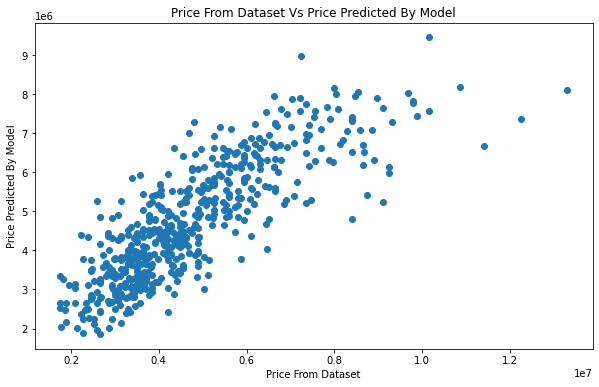

In [879]:
plt.scatter(y, model_ols.predict(X))
plt.xlabel('Price From Dataset')
plt.ylabel('Price Predicted By Model')
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
plt.title("Price From Dataset Vs Price Predicted By Model")

In [883]:
eg = ds.loc[220,ds.columns.difference(['price','area'])]
eg.values

array([1, 8.99961934066053, 1, 1, 4, 1, 0, 1, 1, 0, 4], dtype=object)

In [881]:
model_ols.predict([eg.values])

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


array([7301447.38017774])